## Соревнование по сентимент-анализу

In [195]:
#загрузка необходимых библиотек для сентимент-анализа
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

from IPython.display import Image

In [179]:
#загрузка данных
header_list = ["text", "label"]
train = pd.read_csv('products_sentiment_train.tsv', sep='\t', names=header_list)
test =  pd.read_csv('products_sentiment_test.tsv', sep='\t')

#Отделение признакового пространства и целевых значений
X = train['text']
y = train['label']

In [191]:
#разработка пайплайна, которая с помощью метода tfidf переводит текст в векторы, 
#а затем с помощью логистической регрессии создается модель
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression()),
    ])

In [183]:
#для увеличения качества прогнозной модели введем переборы для отдельных параметров пайплайна:
parameters = {'tfidf__max_df': (0.25, 0.5, 0.75),
              'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'clf__penalty': ('l1', 'l2', 'elasticnet', 'none'),
              'clf__solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
             }

In [185]:
#с помощью жадного алгоритма отберем лучшие параметры, предварительно учитывая кросс-валидацию с помощью функции cv
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)

In [186]:
#прогноняем имеющиеся данные по пайплайну
%%time
gs_clf = gs_clf.fit(X, y)

C:\Users\Rollan\Miniconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Wall time: 1min 15s


In [193]:
#результаты отобранных параметров для модели и лучший результат модели
print(gs_clf.best_params_)
print(gs_clf.best_score_)

{'clf__penalty': 'none', 'clf__solver': 'newton-cg', 'tfidf__max_df': 0.75, 'tfidf__ngram_range': (1, 3)}
0.795


In [194]:
#определение сентимента неотменченных данных и экспорт csv-файла
prediction = gs_clf.predict(test['text'])

pd.DataFrame(prediction, columns=['y']).to_csv('prediction.csv')

###### На тестовых данных результат составил 0.82

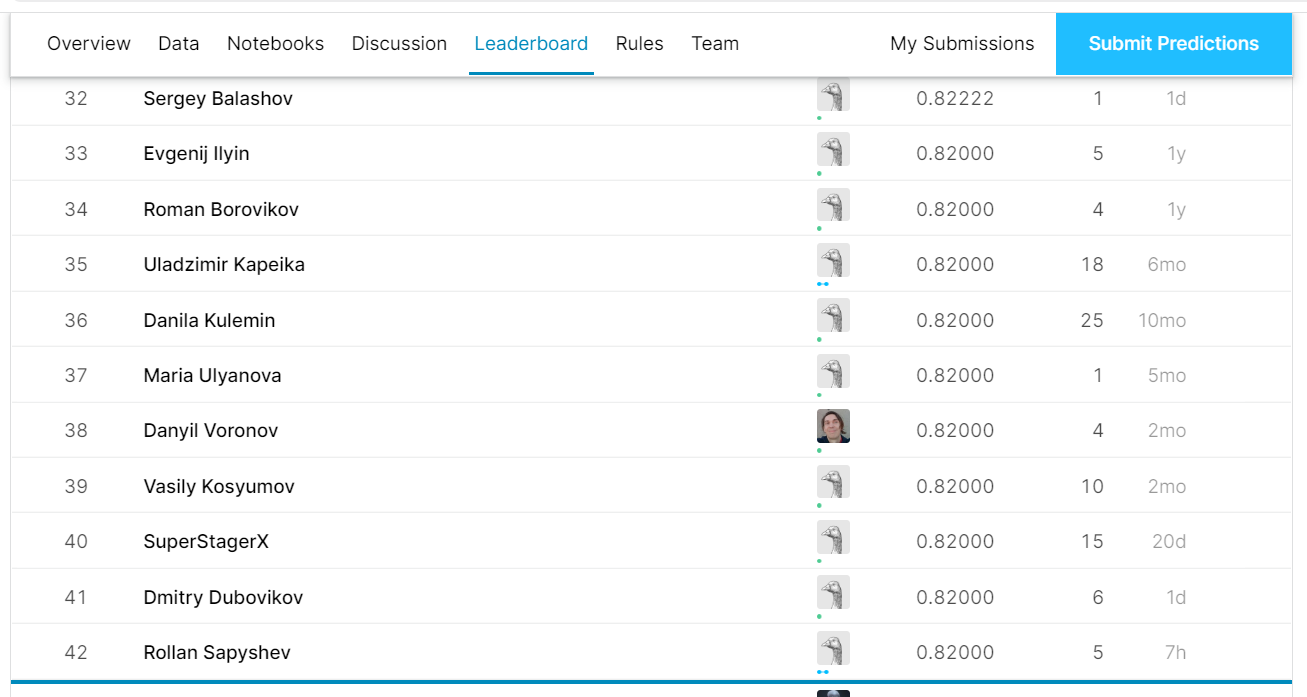

In [198]:
Image("Leaderboard_Sapyshev.PNG", width=1000, height=1000)